In [1]:
'''
    Import the NumPy library for numerical computations
    Import the Pandas library for data manipulation and analysis
    Import the Matplotlib library for data visualization
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read a CSV file and storing it in the 'dataset' variable
dataset = pd.read_csv('../Dataset/air_passengers.csv')

In [3]:
# Retrieve the first few rows of the 'dataset' DataFrame
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
# Display the data types of each column in the 'dataset' DataFrame
dataset.dtypes

Month          object
#Passengers     int64
dtype: object

In [5]:
'''
    Import the to_datetime function from the pandas library
    Rename the columns of the 'dataset' DataFrame to "ds" and "y"
    Convert the "ds" column to datetime format
'''

from pandas import to_datetime  
dataset.columns = ["ds", "y"]  
dataset["ds"] = to_datetime(dataset["ds"], format='%Y-%m')  


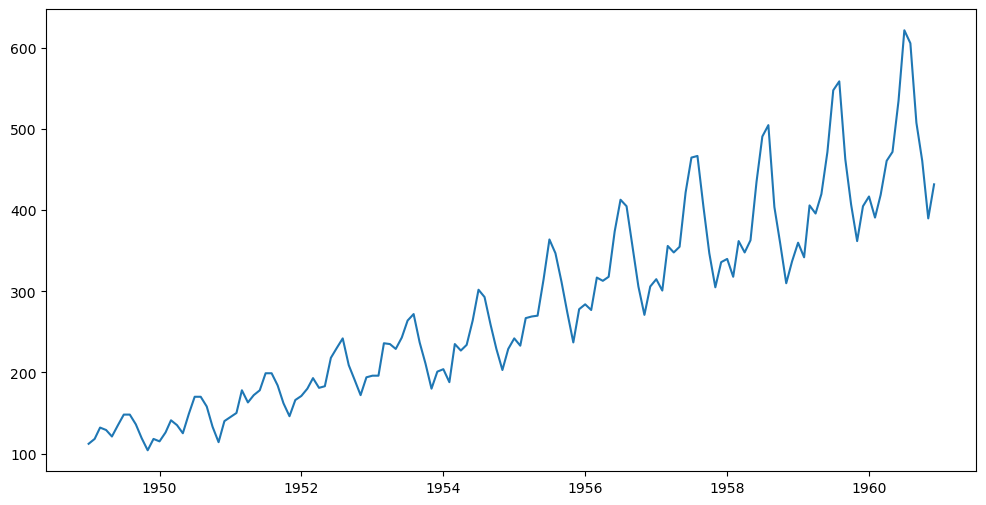

In [6]:
'''
    Create a new figure with a specific size of 12 inches (width) by 6 inches (height)
    Plot the values in the 'dataset' DataFrame, using the "ds" column as the x-axis
'''

plt.figure(figsize=(12, 6))  
plt.plot(dataset.set_index(["ds"]))  

In [7]:
'''
    Import the Prophet class from the prophet library
    Create an instance of the Prophet class and assigning it to the variable 'model'
    Fit the Prophet model to the 'dataset' DataFrame
'''

from prophet import Prophet
model = Prophet()
model.fit(dataset)

17:58:04 - cmdstanpy - INFO - Chain [1] start processing
17:58:04 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
'''
    Generate a DataFrame with future dates for making predictions
    Display the last few rows of the 'future_predictions' DataFrame
'''

future_predictions = model.make_future_dataframe(periods=365, freq='D')
future_predictions.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [9]:
# Generate predictions for the future dates using the trained model
forecast = model.predict(future_predictions)

In [10]:
# Display the first few rows of the 'forecast' DataFrame
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.253948,56.650335,114.906823,107.253948,107.253948,-21.389753,-21.389753,-21.389753,-21.389753,-21.389753,-21.389753,0.0,0.0,0.0,85.864195
1,1949-02-01,109.404281,51.712929,109.010075,109.404281,109.404281,-30.067255,-30.067255,-30.067255,-30.067255,-30.067255,-30.067255,0.0,0.0,0.0,79.337026
2,1949-03-01,111.346517,82.339406,140.293121,111.346517,111.346517,-0.439217,-0.439217,-0.439217,-0.439217,-0.439217,-0.439217,0.0,0.0,0.0,110.907300
3,1949-04-01,113.496850,79.184121,139.361920,113.496850,113.496850,-4.957559,-4.957559,-4.957559,-4.957559,-4.957559,-4.957559,0.0,0.0,0.0,108.539291
4,1949-05-01,115.577817,82.485348,140.887919,115.577817,115.577817,-3.683712,-3.683712,-3.683712,-3.683712,-3.683712,-3.683712,0.0,0.0,0.0,111.894105


In [11]:
# Print specific columns from the 'forecast' DataFrame
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

            ds        yhat  yhat_lower  yhat_upper
0   1949-01-01   85.864195   56.650335  114.906823
1   1949-02-01   79.337026   51.712929  109.010075
2   1949-03-01  110.907300   82.339406  140.293121
3   1949-04-01  108.539291   79.184121  139.361920
4   1949-05-01  111.894105   82.485348  140.887919
..         ...         ...         ...         ...
504 1961-11-27  499.504120  471.015778  529.855229
505 1961-11-28  497.906721  469.341883  526.744842
506 1961-11-29  495.593040  467.249493  525.643305
507 1961-11-30  492.604821  464.615570  521.241308
508 1961-12-01  489.001385  461.023285  517.427185

[509 rows x 4 columns]


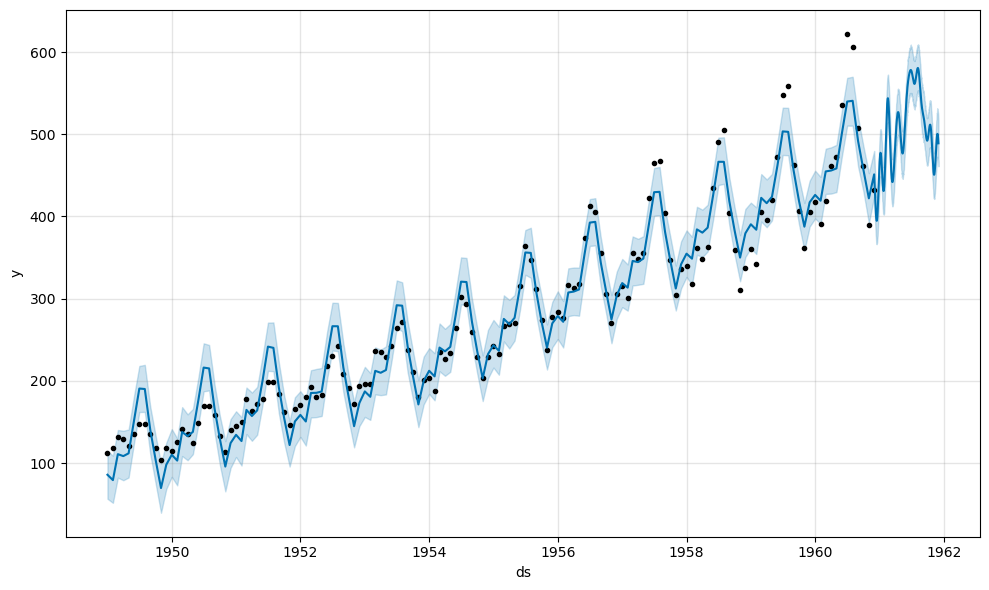

In [12]:
'''
    Plot the forecasted values using the Prophet model's built-in plot function
    Display the plot
'''

model.plot(forecast)  
plt.show()  


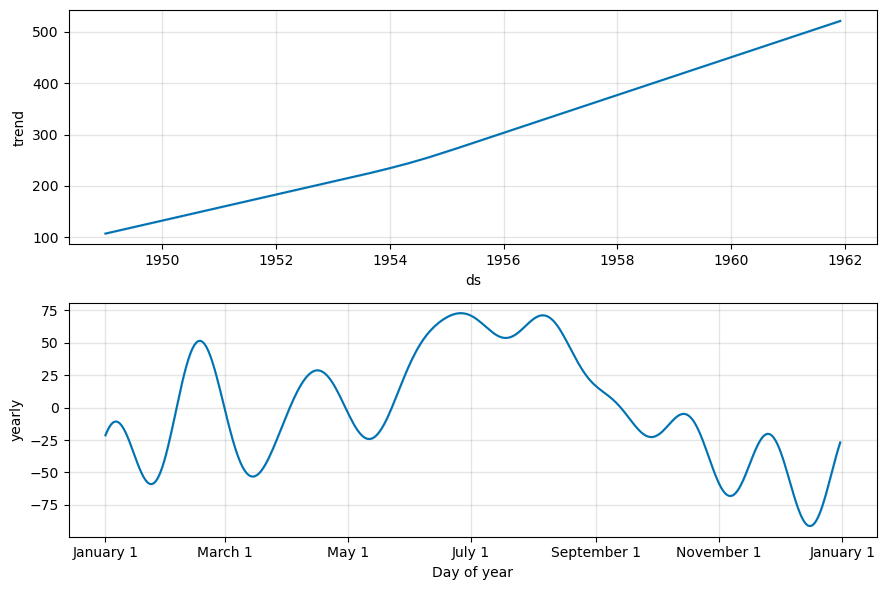

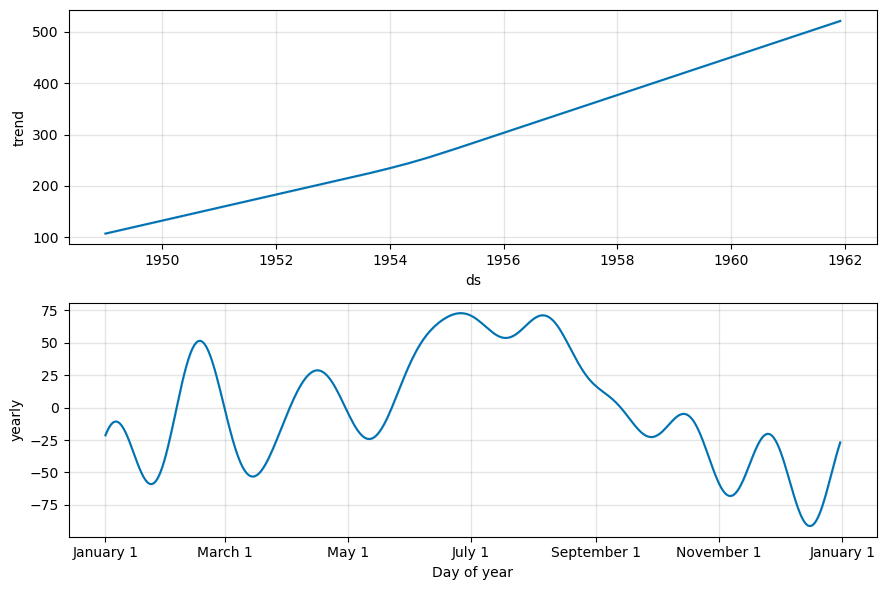

In [13]:
# Plot the components of the forecasted values using the Prophet model's built-in plot_components function
model.plot_components(forecast)  

In [14]:
# Import the cross_validation function from the prophet.diagnostics module
from prophet.diagnostics import cross_validation

In [15]:
'''
    Cross validate the model using cross_validation from the prophet.diagnostics module
    Display the data of the cross validation step using the function cross_validation
'''

cross_validation_data = cross_validation(model = model, 
                                         initial = '530 days',
                                         period = '180 days', 
                                         horizon = '365 days')  

cross_validation_data

  0%|          | 0/20 [00:00<?, ?it/s]

17:58:16 - cmdstanpy - INFO - Chain [1] start processing
17:58:30 - cmdstanpy - INFO - Chain [1] done processing
17:58:30 - cmdstanpy - INFO - Chain [1] start processing
17:58:44 - cmdstanpy - INFO - Chain [1] done processing
17:58:45 - cmdstanpy - INFO - Chain [1] start processing
17:58:45 - cmdstanpy - INFO - Chain [1] done processing
17:58:45 - cmdstanpy - INFO - Chain [1] start processing
17:58:46 - cmdstanpy - INFO - Chain [1] done processing
17:58:46 - cmdstanpy - INFO - Chain [1] start processing
17:58:46 - cmdstanpy - INFO - Chain [1] done processing
17:58:46 - cmdstanpy - INFO - Chain [1] start processing
17:58:47 - cmdstanpy - INFO - Chain [1] done processing
17:58:47 - cmdstanpy - INFO - Chain [1] start processing
17:58:48 - cmdstanpy - INFO - Chain [1] done processing
17:58:48 - cmdstanpy - INFO - Chain [1] start processing
17:58:48 - cmdstanpy - INFO - Chain [1] done processing
17:58:48 - cmdstanpy - INFO - Chain [1] start processing
17:58:49 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1950-08-01,149.055863,148.679039,149.444393,170,1950-07-22
1,1950-09-01,129.855785,128.657664,131.088777,158,1950-07-22
2,1950-10-01,119.516841,117.153446,121.891599,133,1950-07-22
3,1950-11-01,104.089106,100.251598,107.775269,114,1950-07-22
4,1950-12-01,140.634588,135.283416,146.043349,140,1950-07-22
...,...,...,...,...,...,...
235,1960-08-01,527.210913,500.442396,553.179822,606,1959-12-02
236,1960-09-01,486.018577,459.531500,512.095327,508,1959-12-02
237,1960-10-01,452.356285,427.890114,479.898082,461,1959-12-02
238,1960-11-01,422.541206,396.424880,449.812109,390,1959-12-02


In [16]:
'''
    Import the performance_metrics function from the prophet.diagnostics module
    Compute performance metrics based on the cross-validation results
    Display the first few rows of the performance metrics DataFrame
'''

from prophet.diagnostics import performance_metrics
performance_metrics_data = performance_metrics(cross_validation_data)
performance_metrics_data.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,41 days,1046.443185,32.348774,25.727258,0.084298,0.085902,0.086323,0.208333
1,42 days,980.276508,31.309368,25.249590,0.083418,0.085902,0.085154,0.166667
2,46 days,1022.838179,31.981841,26.462040,0.086573,0.085902,0.087565,0.125000
3,47 days,991.766665,31.492327,26.193085,0.085285,0.085902,0.086088,0.125000
4,48 days,990.275933,31.468650,26.015815,0.083975,0.085902,0.084817,0.166667


In [34]:
'''
    Import the pickle module for object serialization
    Save the 'model' object as a pickle file
'''

import pickle  
pickle.dump(model, open('../Flask/air_passengers.pkl', 'wb'))  
